In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pay = pd.read_csv('F:\\Downloads\\dseb-63-data-preparation-final-project\\dseb63_final_project_DP_dataset\\dseb63_installments_payments.csv')

In [5]:
pay

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR
0,1054186,1.0,6,-1180.0,-1187.0,6948.360,6948.360,147397.0
1,2452854,1.0,21,-546.0,-552.0,11302.605,11302.605,147397.0
2,1054186,1.0,2,-1300.0,-1307.0,6948.360,6948.360,147397.0
3,1682318,1.0,2,-240.0,-243.0,7374.510,7374.510,147397.0
4,2452854,1.0,10,-876.0,-882.0,11302.605,11302.605,147397.0
...,...,...,...,...,...,...,...,...
7744753,2192667,1.0,6,-2352.0,-2352.0,5322.240,5322.240,21216.0
7744754,2208281,1.0,4,-452.0,-466.0,63195.435,63195.435,21216.0
7744755,2657771,0.0,3,-2907.0,-2932.0,3375.000,3375.000,21216.0
7744756,2657771,0.0,47,-1871.0,-1871.0,4915.890,4915.890,21216.0


In [49]:
print(pay.head())

   SK_ID_PREV  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  \
0     1054186                     1.0                      6          -1180.0   
1     2452854                     1.0                     21           -546.0   
2     1054186                     1.0                      2          -1300.0   
3     1682318                     1.0                      2           -240.0   
4     2452854                     1.0                     10           -876.0   

   DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  SK_ID_CURR  
0             -1187.0        6948.360     6948.360    147397.0  
1              -552.0       11302.605    11302.605    147397.0  
2             -1307.0        6948.360     6948.360    147397.0  
3              -243.0        7374.510     7374.510    147397.0  
4              -882.0       11302.605    11302.605    147397.0  


## Null Values Check

In [11]:
check_null = pay.isna().sum().sort_values(ascending=False)
percentage = ((pay.isnull().sum()/len(pay)*100)).sort_values(ascending=False)
null_cols = pd.concat([check_null, percentage], axis=1, keys=['Count','Percentage'])
print('Distributions of Missing values:')
null_cols.head(20)

Distributions of Missing values:


,Count,Percentage
DAYS_ENTRY_PAYMENT,1639,0.021163
AMT_PAYMENT,1639,0.021163
AMT_INSTALMENT,1,0.000013
SK_ID_CURR,1,0.000013
SK_ID_PREV,0,0.000000
NUM_INSTALMENT_VERSION,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000
DAYS_INSTALMENT,0,0.000000


## Null Percentage > 90% Check

In [12]:
print('Columns that contain more than 90% missing values:')
more90_cols = pay.loc[:,(pay.isnull().sum(axis = 0) / pay.shape[0]) >= 0.9].columns
more90_cols

Columns that contain more than 90% missing values:


Index([], dtype='object')

NO COLUMNS HAVE NULL VALUES > 90% -> SO WE'RE KEEPING THE DATASET AS IT IS FOR NOW

## Duplicates Check

In [14]:
pay.duplicated().sum()

0

# Outliers Check

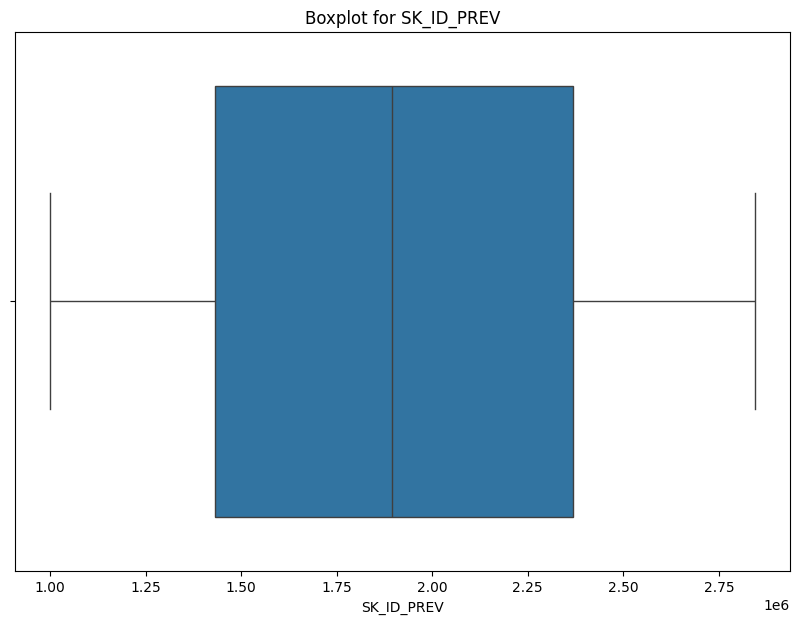

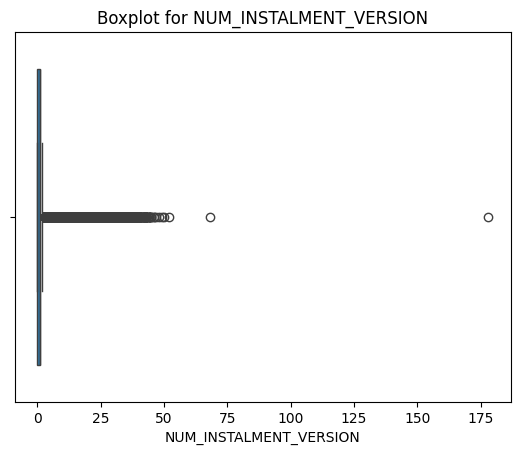

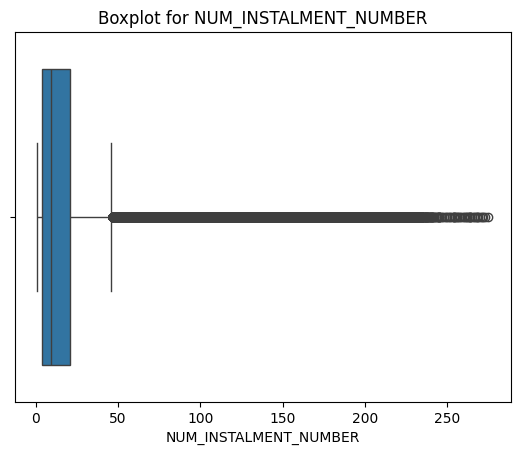

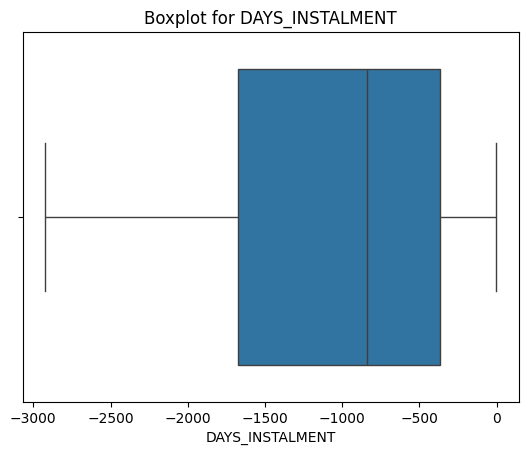

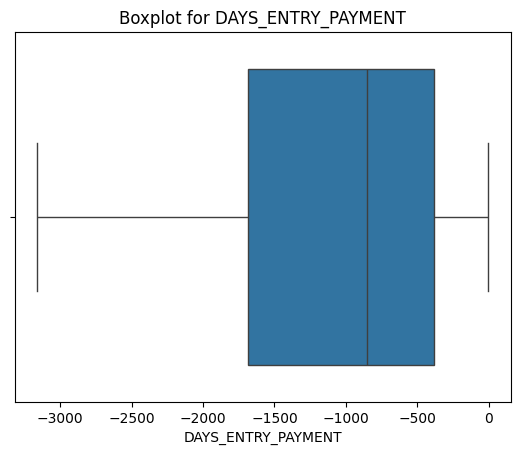

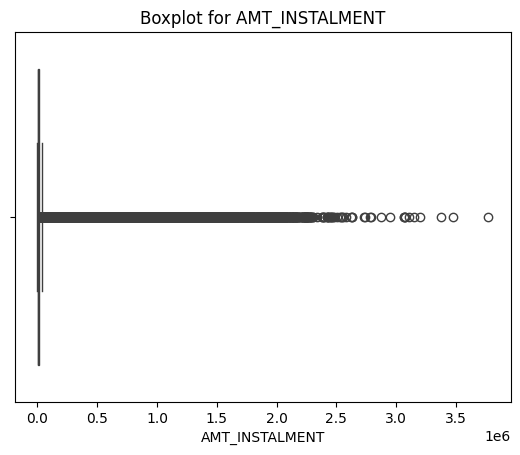

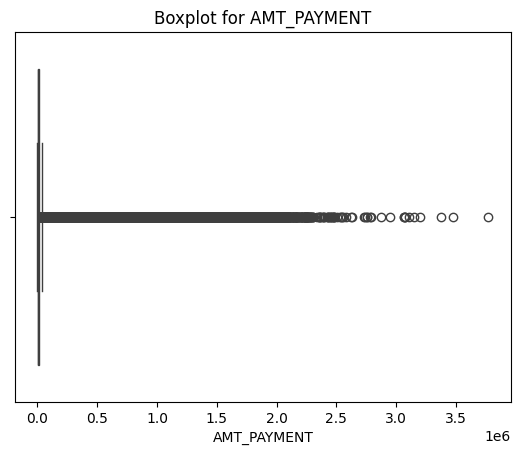

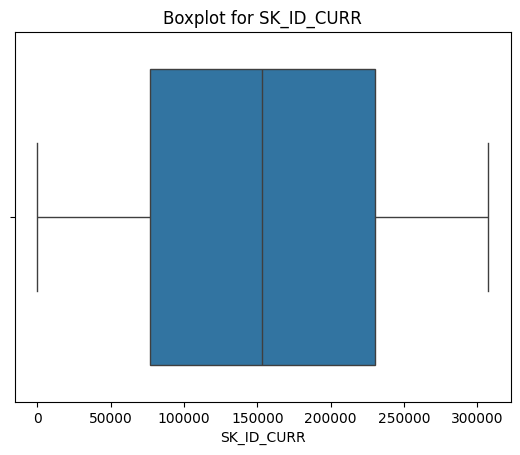

In [10]:
plt.figure(figsize=(10, 7))

for column in pay.columns:
    sns.boxplot(x=pay[column])

    plt.title(f'Boxplot for {column}')

    plt.show()

# Data Exploration

In [4]:
num_data = pay._get_numeric_data()
cate_data = pay.drop(columns=num_data.columns)

## Numerical Data

In [18]:
for i in num_data.columns:
    great0 = pay[i][pay[i] > 0].count()
    equal0 =  pay[i][pay[i] == 0].count()
    small0 = pay[i][pay[i] < 0].count()
    nan_total = pay[i].isnull().sum()
    other_value = pay.shape[0] - great0 - small0 - nan_total - equal0
    print(f'{i}  has  {great0} values greater than 0,  {equal0} values equal to 0,  {small0} values less than 0,  NaN: {nan_total},  other values: {other_value}')

SK_ID_PREV  has  7744758 values greater than 0,  0 values equal to 0,  0 values less than 0,  NaN: 0,  other values: 0
NUM_INSTALMENT_VERSION  has  5280831 values greater than 0,  2463927 values equal to 0,  0 values less than 0,  NaN: 0,  other values: 0
NUM_INSTALMENT_NUMBER  has  7744758 values greater than 0,  0 values equal to 0,  0 values less than 0,  NaN: 0,  other values: 0
DAYS_INSTALMENT  has  0 values greater than 0,  0 values equal to 0,  7744758 values less than 0,  NaN: 0,  other values: 0
DAYS_ENTRY_PAYMENT  has  0 values greater than 0,  0 values equal to 0,  7743119 values less than 0,  NaN: 1639,  other values: 0
AMT_INSTALMENT  has  7744570 values greater than 0,  187 values equal to 0,  0 values less than 0,  NaN: 1,  other values: 0
AMT_PAYMENT  has  7742222 values greater than 0,  897 values equal to 0,  0 values less than 0,  NaN: 1639,  other values: 0
SK_ID_CURR  has  7744727 values greater than 0,  30 values equal to 0,  0 values less than 0,  NaN: 1,  other 

## Categorical Data

In [19]:
for i in cate_data.columns[:8]:
    print(f'col {i} : {list(cate_data[i].unique())}\n')

In [20]:
for i in cate_data.columns[8:]:
    print(f'col {i} : {list(cate_data[i].unique())}\n')

# EDA Internal

## Univariate Analysis

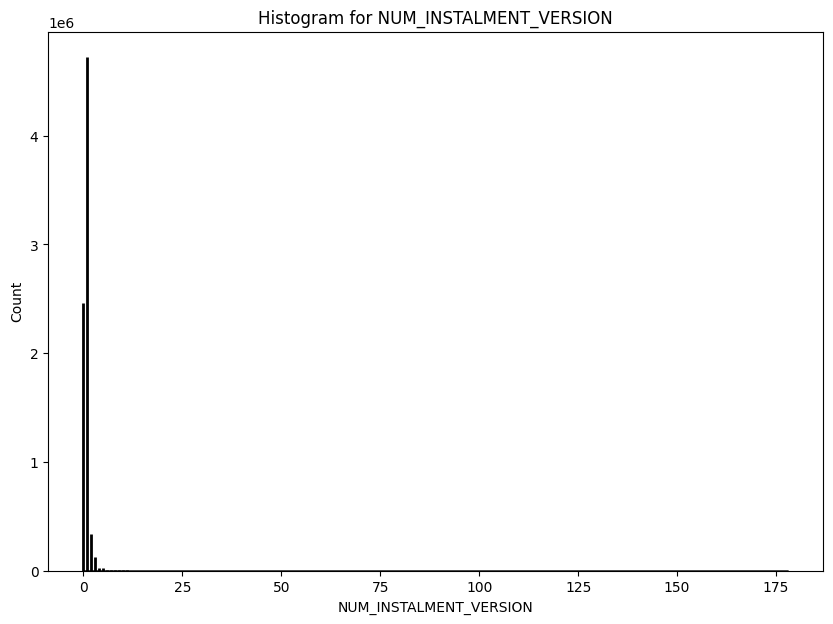

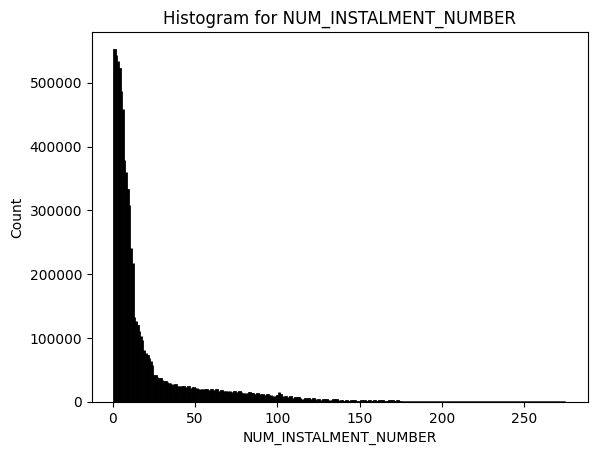

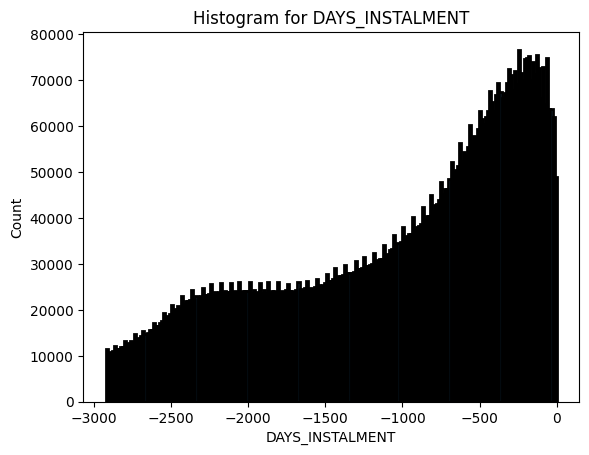

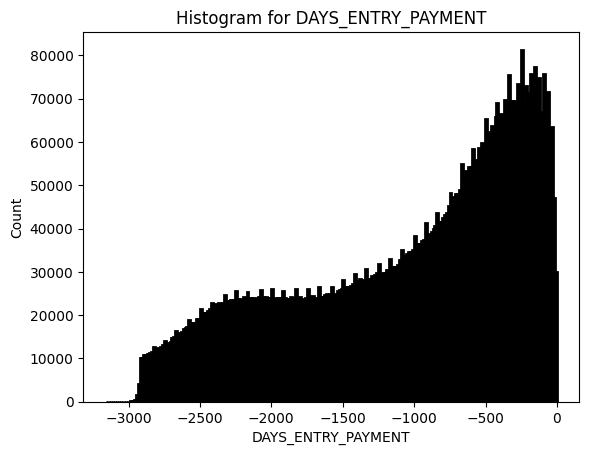

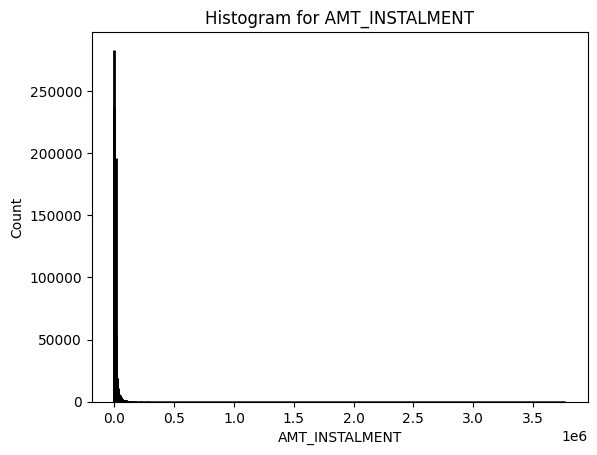

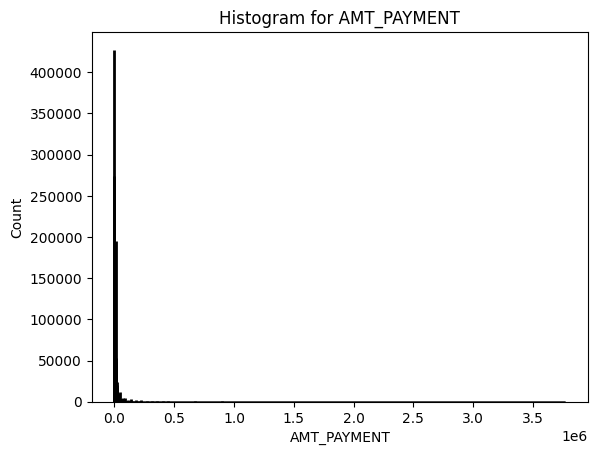

In [48]:
plt.figure(figsize=(10, 7))

for column in pay.iloc[:,1:7]:
    sns.histplot(x=pay[column], linewidth = 2)

    plt.title(f'Histogram for {column}')

    plt.show()

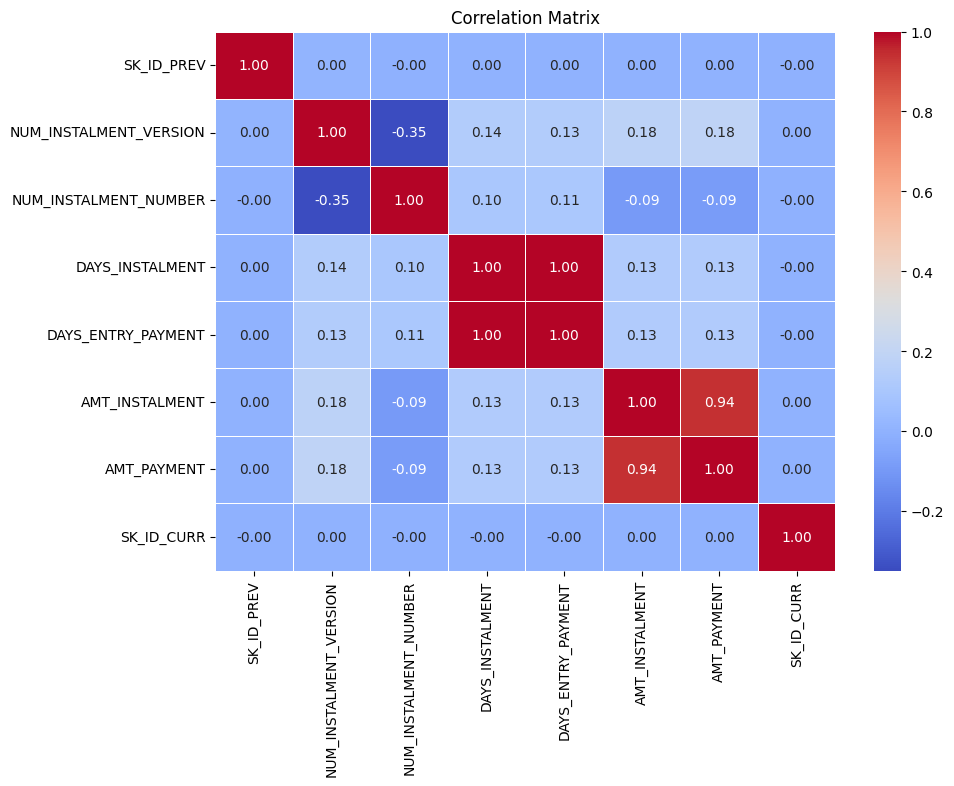

In [45]:
correlation_matrix = pay.corr(method="pearson",numeric_only=True)
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Features that have high correlation: 
* DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT (1.00)
* AMT_INSTALMENT - AMT_PAYMENT (0.94)

### Creating features and dropping perfect correlated features

In [24]:
new_pay = pay.drop(columns=['DAYS_INSTALMENT'])

new_pay['DAYS_ONTIME'] = pay['DAYS_INSTALMENT'] - pay['DAYS_ENTRY_PAYMENT']

new_pay.head()

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR,DAYS_ONTIME
0,1054186,1.0,6,-1187.0,6948.360,6948.360,147397.0,7.0
1,2452854,1.0,21,-552.0,11302.605,11302.605,147397.0,6.0
2,1054186,1.0,2,-1307.0,6948.360,6948.360,147397.0,7.0
3,1682318,1.0,2,-243.0,7374.510,7374.510,147397.0,3.0
4,2452854,1.0,10,-882.0,11302.605,11302.605,147397.0,6.0


In [25]:
new_pay['DAYS_ONTIME'].describe()

count    7.743119e+06
mean     8.560560e+00
std      2.561625e+01
min     -2.882000e+03
25%      0.000000e+00
50%      5.000000e+00
75%      1.400000e+01
max      1.640000e+03
Name: DAYS_ONTIME, dtype: float64

In [30]:
new_pay['DAYS_ONTIME'].mean()

8.560560027554788

In [16]:
num_data = new_pay._get_numeric_data()
cate_data = new_pay.drop(columns=num_data.columns)

# EDA External

In [17]:
app_train = pd.read_csv('F:\\Downloads\\dseb-63-data-preparation-final-project\\dseb63_final_project_DP_dataset\\dseb63_application_train.csv')
app_train = app_train[['SK_ID_CURR','TARGET']]

In [18]:
merge_table = pd.merge(new_pay,app_train,on='SK_ID_CURR',how='left')
merge_table.head()

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR,DAYS_ONTIME,TARGET
0,1054186,1.0,6,-1187.0,6948.360,6948.360,147397.0,7.0,0.0
1,2452854,1.0,21,-552.0,11302.605,11302.605,147397.0,6.0,0.0
2,1054186,1.0,2,-1307.0,6948.360,6948.360,147397.0,7.0,0.0
3,1682318,1.0,2,-243.0,7374.510,7374.510,147397.0,3.0,0.0
4,2452854,1.0,10,-882.0,11302.605,11302.605,147397.0,6.0,0.0


In [19]:
num_data.columns

Index(['SK_ID_PREV', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER',
       'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT', 'SK_ID_CURR',
       'DAYS_ONTIME'],
      dtype='object')

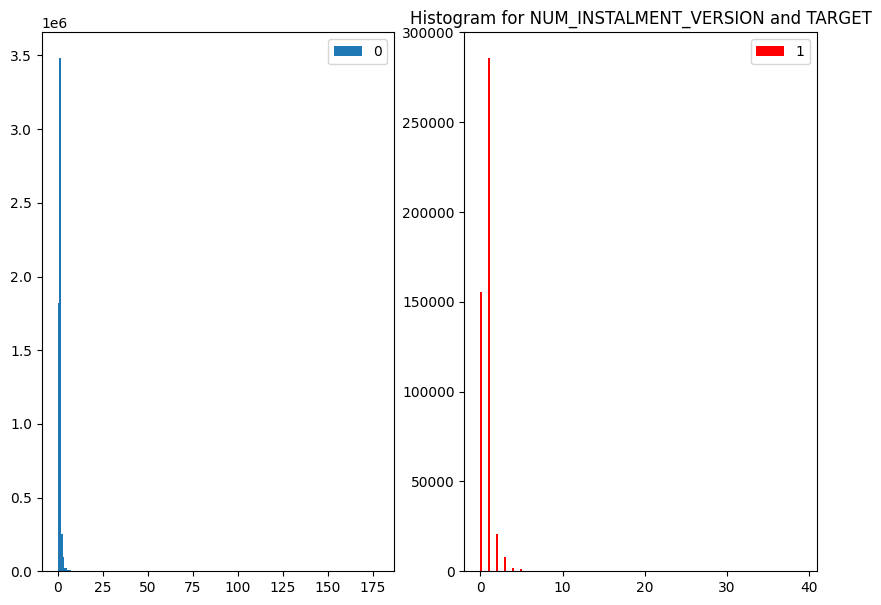

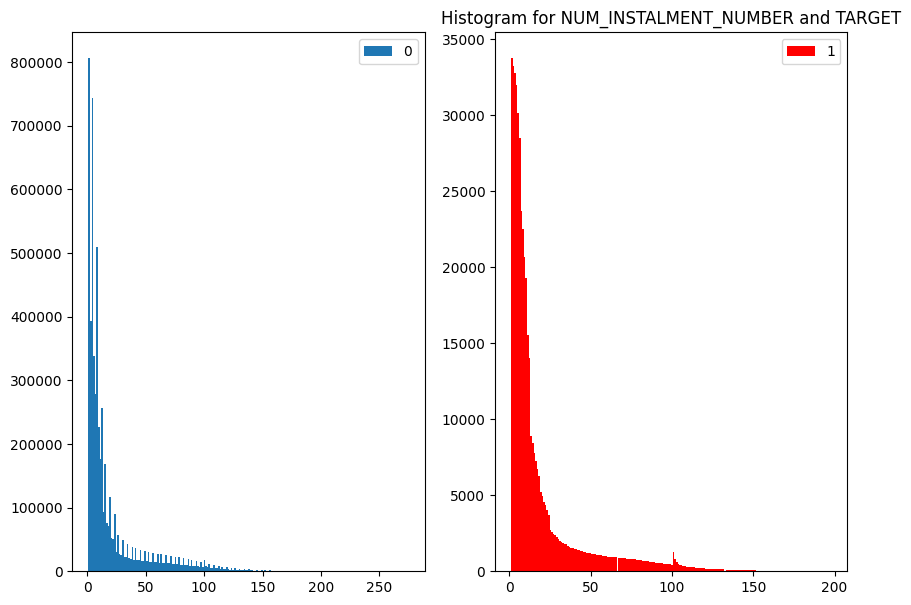

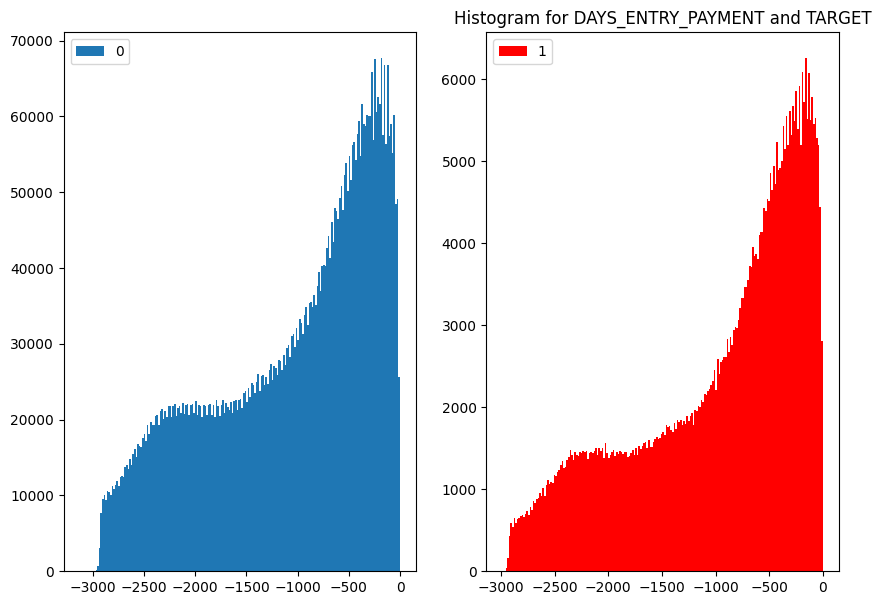

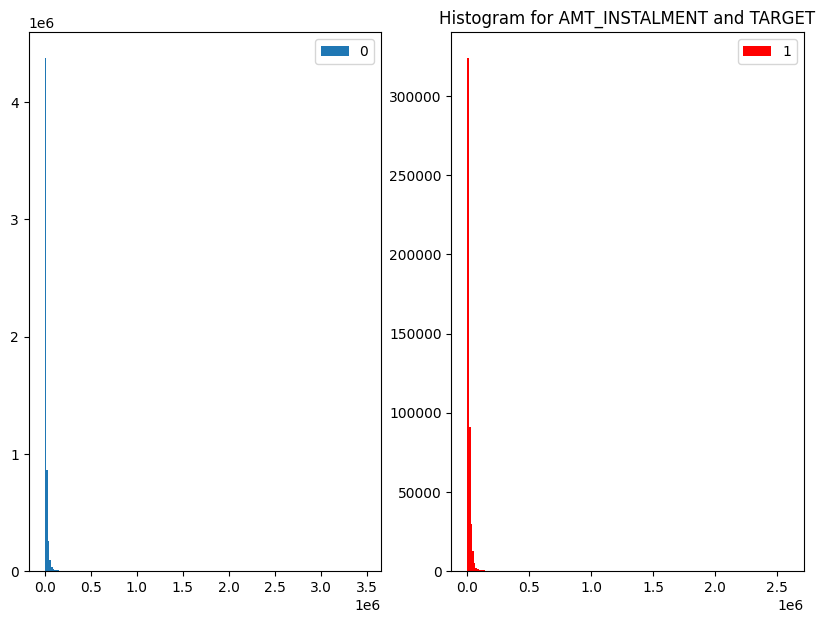

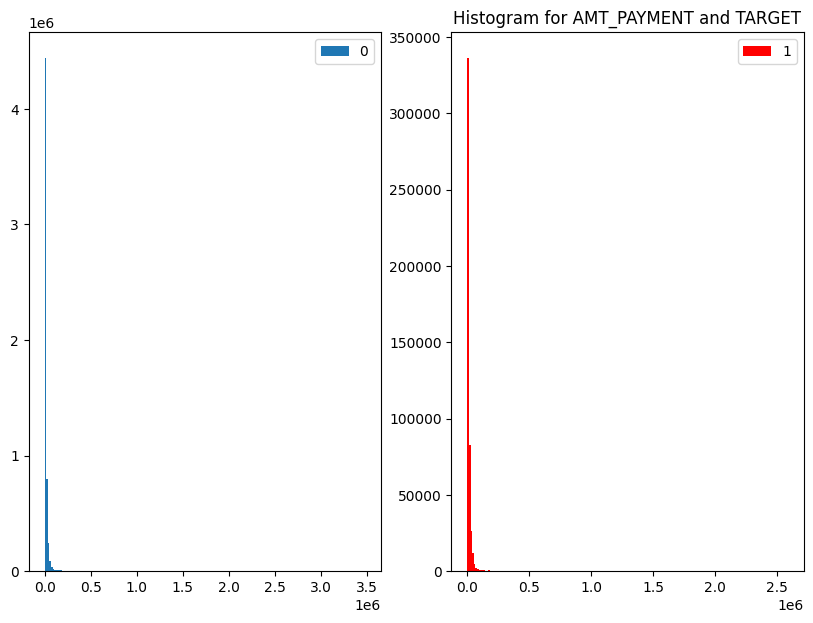

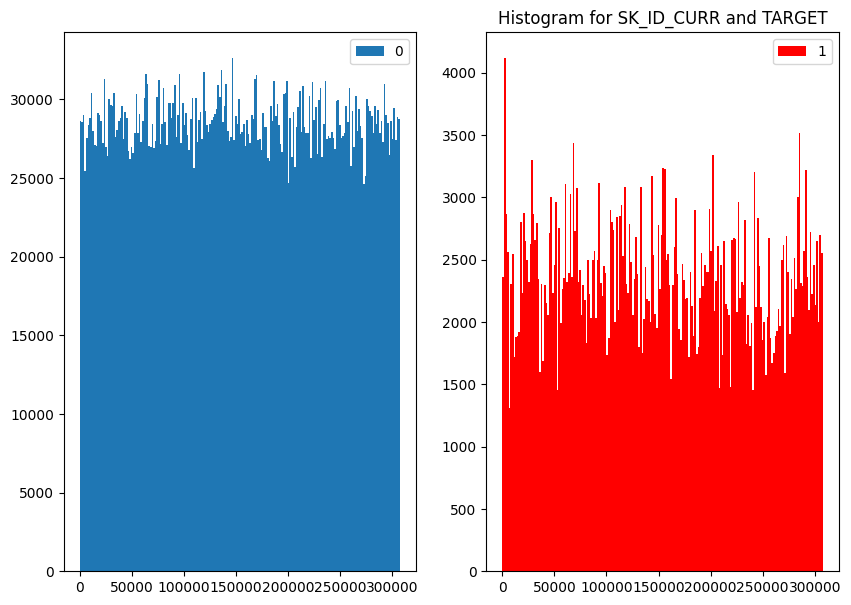

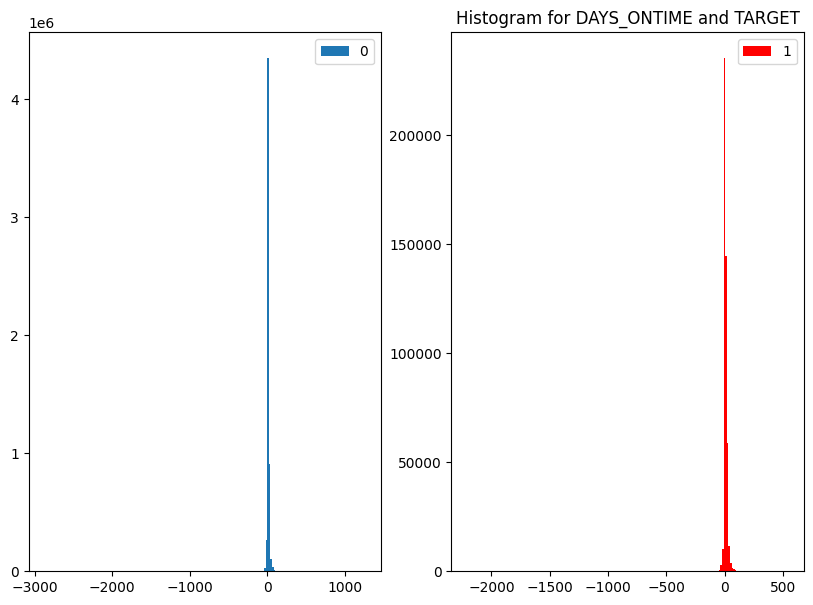

In [22]:
for col in num_data.iloc[:,1:8]:
    fig,ax = plt.subplots(1,2,figsize =(10,7))
    class0 = merge_table[merge_table['TARGET']==0][col]
    class1 = merge_table[merge_table['TARGET']==1][col]
    ax[0].hist(class0,bins = 200,label = 0)
    ax[1].hist(class1,bins = 200,color = 'red',label= 1)
    ax[0].legend()
    ax[1].legend()
    plt.title(f'Histogram for {col} and TARGET')

### Data Insights: 
* From the histograms, we can observe that the distributions for the two target values are different on 'NUM_INSTALLMENT_VERSION', 'NUM_INSTALMENT_NUMBER, 'DAYS_ENTRY_PAYMENT'. This suggests that these features may have an impact on the ‘TARGET’ variable. However, to determine the exact nature of this impact, further statistical analysis would be required.